In [87]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5, linewidth=200, threshold=1000, suppress=False)

In [71]:


def KSS(d =0, alpha = 1,x  = 0):

    kappa = 10**(3/4)/np.sqrt(alpha)   

    print(kappa)

    if kappa**2<100*x:
        kappa = np.sqrt(100*x)
    
    ML = 4
    m_tilde_sq = ((ML)/(np.pi))**(2)

    def beta(x):
            return d/np.sqrt(m_tilde_sq + d**2+ 4*x) 

    def gamma(x):
            return 1/np.sqrt(1-beta(x)**2)

    omega_k = np.sqrt(kappa**2 + m_tilde_sq/4)

    Xi = gamma(x)*(kappa + omega_k * beta(x))

    Xi_sq = Xi**2

    return Xi_sq #-1e5


# #solve for KSS = 1e5 for x >5 using root finding

# from scipy.optimize import root_scalar

# sol = root_scalar(KSS ,args=(3, 0.01),bracket = [10,100])
# print(sol.root)




In [72]:
KSS(d = 4, alpha = 0.01, x = 10)

56.23413251903491


10207.901853457168

In [73]:
xs = np.linspace(0, 100, 10000)
y = np.array([KSS(d = 0, alpha = 0.01, x = i) for i in xs])

56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.23413251903491
56.2341325

In [63]:


reference_t = 56 #1e5, roughly 50 s
reference_Xi_sq = 1e5

times = (y/reference_Xi_sq)**2*50

print(times)


[0.05   0.05   0.05   ... 0.4998 0.4999 0.5   ]


In [60]:
print(np.sum(times)/3600)

0.4922704779717785


In [51]:


plt.semilogy(xs, y)
plt.xlabel('$x$')
plt.ylabel('$\log_{10}(\Xi^2)$')
plt.hlines(10**5, 0, max(xs), colors='r', linestyles='dashed', label='1e6')

plt.show()



In [442]:
ds = np.array([[0,0,0], [1,0,0], [1,1,0], [1,1,1], [2,0,0], [2,1,0], [2,1,1], [2,2,0], [2,2,1], [2,2,2], [3,0,0], [3,1,0], [3,1,1], [3,2,0], [3,2,1], [3,2,2], [3,3,0], [3,3,1], [3,3,2], [3,3,3], [4,0,0], [4,1,0], [4,1,1], [4,2,0], [4,2,1], [4,2,2], [4,3,0], [4,3,1], [4,3,2], [4,3,3], [4,4,0], [4,4,1], [4,4,2], [4,4,3], [4,4,4]])

In [443]:
alpha = 0.1
x = 30


inputs = np.sum(ds**2, axis=1)
inputs = np.unique(inputs)
outputs = np.array([KSS(d, alpha,x) for d in inputs])




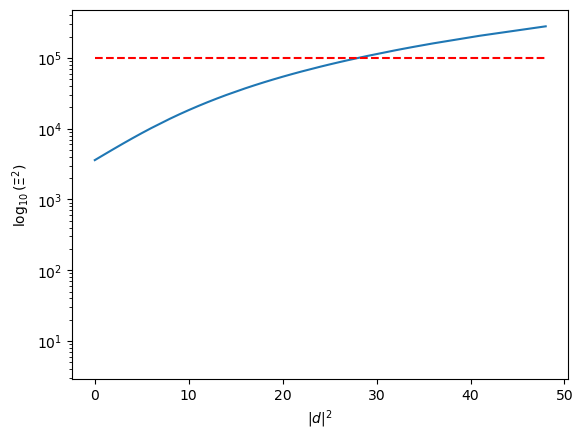

[3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5]
[  3600.        4314.79089   5163.93134   6162.73781   7325.37349   8664.48675  10191.03573  13841.87844  15980.09033  18333.95937  20907.52977  23704.03067  26726.03708  29975.60366  37163.66399
  41104.53691  45277.85061  49684.30292  54324.46392  59198.80171  64307.70262  75230.42245  81044.73242  87094.60546  93380.20092 106659.08067 128348.12179 136050.30266 143988.83315 160575.1301
 206179.73096 279963.9437 ]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 24 25 26 27 29 32 33 34 36 41 48]


In [208]:


plt.semilogy(inputs, outputs)
plt.xlabel('$| d |^2 $')
plt.ylabel('$\log_{10}(\Xi^2)$')
plt.hlines(10**5, 0, max(inputs), colors='r', linestyles='dashed', label='1e6')

plt.show()

print(np.array(np.log10(outputs), dtype = int))
print(outputs)
print(inputs)

In [185]:
print(inputs[np.where(outputs >= 10**5)])

[ 4  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 24 25 26 27 29 32 33 34 36 41 48]


In [81]:
def RK(d =0, alpha = 1,x  = 0):

    kappa = 10**(3/4)/np.sqrt(alpha)      
    
    ML = 4
    m_tilde_sq = ((ML)/(np.pi))**(2)

    def beta(x):
            return d/np.sqrt(m_tilde_sq + d**2+ 4*x) 

    def gamma(x):
            return 1/np.sqrt(1-beta(x)**2)

    omega_k = np.sqrt(kappa**2 + m_tilde_sq/4)

    Xi = kappa*gamma(x) + d/2

    Xi_sq = Xi**2

    return Xi_sq

In [82]:
alpha = 0.1
x = 0


inputs = np.sum(ds**2, axis=1)
inputs = np.unique(inputs)
outputs = np.array([RK(d, alpha,x) for d in inputs])

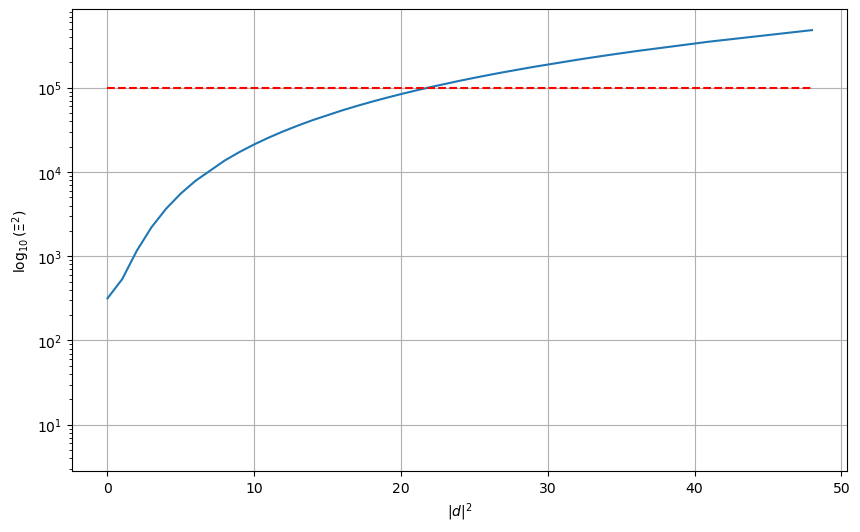

[3.16227766e+02 5.34154738e+02 1.16371504e+03 2.21061599e+03
 3.67578368e+03 5.55941479e+03 7.86156728e+03 1.37215104e+04
 1.72793150e+04 2.12556790e+04 2.56506037e+04 3.04640902e+04
 3.56961388e+04 4.13467500e+04 5.39036609e+04 6.08099610e+04
 6.81348242e+04 7.58782507e+04 8.40402405e+04 9.26207937e+04
 1.01619910e+05 1.20873833e+05 1.31128640e+05 1.41802010e+05
 1.52893944e+05 1.76333502e+05 2.14632065e+05 2.28235379e+05
 2.42257257e+05 2.71556704e+05 3.52130182e+05 4.82512718e+05]


In [83]:

plt.figure(figsize=(10,6))
plt.semilogy(inputs, outputs)
plt.xlabel('$| d |^2 $')
plt.ylabel('$\log_{10}(\Xi^2)$')
plt.hlines(10**5, 0, max(inputs), colors='r', linestyles='dashed', label='1e6')
plt.grid()
plt.show()

print(outputs)

# Runtime plot

In [1]:
from zeta import zeta
from time import time

In [78]:
zeta(0.01, 2e5, 0.1, d = np.array([1,0,0]))

: 

In [4]:
print(time())

1710191496.888565


In [35]:


ks = np.linspace(0,5,30)
cutoff_sq = 10**(ks)

cutoff_sq = np.linspace(0,10e4, 40)

runtime = np.array([])


for i in range(len(cutoff_sq)):
    start = time()
    zeta(0.01, cutoff_sq[i], 0.1, d = np.array([1,0,0]))
    runtime = np.append(runtime, time()-start)



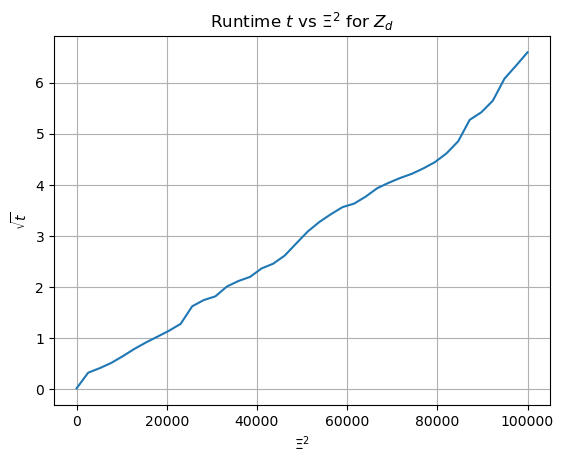

In [45]:
plt.plot(cutoff_sq, np.sqrt(runtime)) 

plt.title('Runtime $t$ vs $\Xi^2$ for $Z_d$')
plt.xlabel('$\Xi^2$')
plt.ylabel('$\sqrt{t}$')
plt.grid()
plt.show()




In [34]:
25/16

1.5625

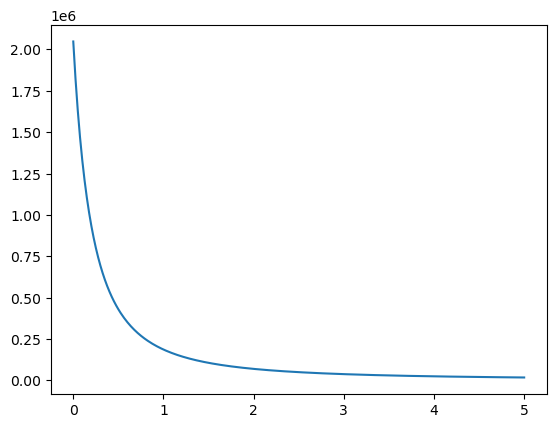

In [53]:
x = np.linspace(0, 5, 400)

y = np.array([worst_case(8, 0.1, i) for i in x])

plt.plot(x, y)



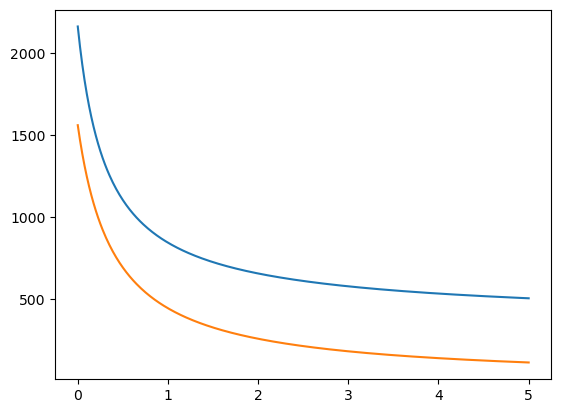

In [77]:
x = np.linspace(0, 5, 400)



tfunc = lambda x: 12.5/(x+0.4)

tf = np.vectorize(tfunc)

y1 = tf(x)
y = np.array([worst_case(1, 0.1, i) for i in x])

plt.plot(x, y)


In [63]:
print((4/np.pi)**2)

1.6211389382774046


In [65]:
12.5*np.log(1+0.4) - 12.5*np.log(0.4)

15.659537106192099

In [71]:
np.sum(tf(np.linspace(0, 1, 400)))

6268.259575868627

# Convergence Idea

By exploiting the analogies of the sum and the integrals I found a nice way to relate the wanted error (which I set to 10^{-6}) to the integral. the condition is:


$\Xi^2 = \left( \frac{1}{\epsilon}   \right)^{1/(a-b-\frac{1}{2})} $

This should serve as a very rough approximation

In [66]:
epsilon = 1e-5

expected_Xi_sq = lambda a,b:  (1/epsilon)**(1/(a-b+1/2)) if a-b > 1/2 else np.nan

In [69]:

a = 2
b = 1
expected_Xi_sq(a,b)


2154.4346900318824

In [342]:
print(10**(-2/3))

0.2154434690031884


In [4]:
import numpy as np
from scipy.special import erfc

# Assign numerical values to k and alpha
k = 1.0  # Example value
alpha = 1.0  # Example value

# Calculate the expression
@np.vectorize
def error2(k, alpha):
    return (5 * np.exp((k**2 * alpha) / 10) * (2 * np.exp(-k**2 * alpha) * k * np.sqrt(alpha) + np.sqrt(np.pi) * (1 + (k**2 * alpha) / 5) * erfc(k * np.sqrt(alpha)))) / (2 * k**2 * alpha**(3/2))




In [455]:
m = np.linspace(0, 5, 100)
a = np.linspace(0, 10, 100)

M, A = np.meshgrid(m, a)

K = 10**M
ALPHA = 10**(-A)

Z = error2(K, ALPHA)


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/2768630323.py:11: RuntimeWarning: overflow encountered in exp
  return (5 * np.exp((k**2 * alpha) / 10) * (2 * np.exp(-k**2 * alpha) * k * np.sqrt(alpha) + np.sqrt(np.pi) * (1 + (k**2 * alpha) / 5) * erfc(k * np.sqrt(alpha)))) / (2 * k**2 * alpha**(3/2))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/2768630323.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  return (5 * np.exp((k**2 * alpha) / 10) * (2 * np.exp(-k**2 * alpha) * k * np.sqrt(alpha) + np.sqrt(np.pi) * (1 + (k**2 * alpha) / 5) * erfc(k * np.sqrt(alpha)))) / (2 * k**2 * alpha**(3/2))


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/3497276177.py:5: RuntimeWarning: invalid value encountered in log10
  contour = plt.contourf(M/2, A, np.log10(Z-1e-5), levels=100, cmap='viridis')


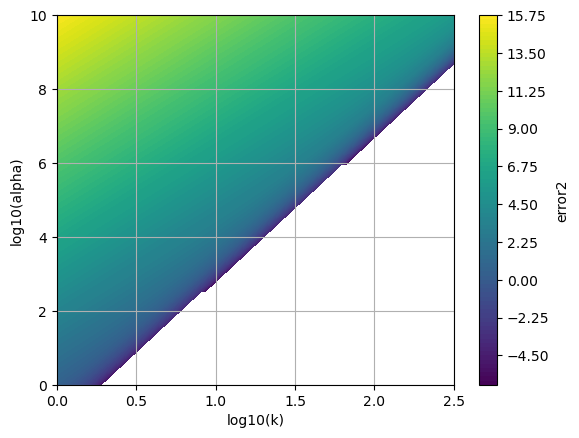

In [456]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


contour = plt.contourf(M/2, A, np.log10(Z-1e-5), levels=100, cmap='viridis')

plt.xlabel('log10(k)')
plt.ylabel('log10(alpha)')

plt.colorbar(contour, label='error2')
plt.grid()
plt.show()


In [445]:
import numpy as np
from scipy.special import erfc

# Define variables (example values)
k = 1.0  # Example value for k
alpha = 1.0  # Example value for alpha

# Calculate the expression
result = erfc(k**2 * alpha) * np.sqrt(np.pi) / np.sqrt(alpha)

def error(k, alpha):
    return erfc(k**2 * alpha) * np.sqrt(np.pi) / np.sqrt(alpha)

In [446]:
m = np.linspace(0, 5, 100)
a = np.linspace(0, 10, 100)

M, A = np.meshgrid(m, a)

K = 10**M
ALPHA = 10**(-A)

Z = error(K, ALPHA)


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/1585280186.py:3: RuntimeWarning: invalid value encountered in log
  contour = plt.contourf(M/2, A, np.log(Z-1e-5), levels=100, cmap='viridis')


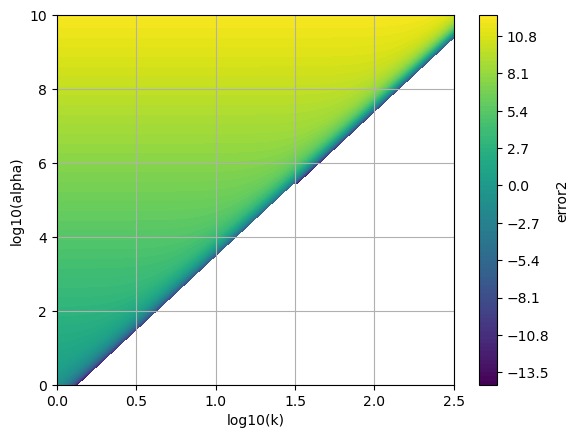

In [449]:

import matplotlib.pyplot as plt

contour = plt.contourf(M/2, A, np.log(Z-1e-5), levels=100, cmap='viridis')

plt.xlabel('log10(k)')
plt.ylabel('log10(alpha)')

plt.colorbar(contour, label='error2')
plt.grid()
plt.show()




# Final Error Approx

here I used mathematica for integration and will solve for the error graphically



In [5]:
def error2(k, alpha):

    x = k**2/100
    return 0.5 * np.exp(x * alpha) * ((2 * np.exp(-k**2 * alpha) * x) / k + (np.sqrt(np.pi) * (1 - 2 * x * alpha) * erfc(k * np.sqrt(alpha))) / np.sqrt(alpha))
    


m = np.linspace(0, 10, 700)
a = np.linspace(0, 10, 700)

M, A = np.meshgrid(m, a)

K = 10**(M/2)

ALPHA = 10**(-A)





In [22]:
Z = error2(K, ALPHA)

import matplotlib.pyplot as plt

#open plots in other window
%matplotlib qt



log_error = np.log10(Z-1e-8)

plt.figure(figsize=(20,10))

contour = plt.contourf(M, A, log_error, levels=100, cmap='viridis')


plt.xlabel('$\log_{10}(\\kappa^2)$')
plt.ylabel('$\log_{10}(\\alpha)$')
plt.colorbar(contour, label='error2')

plt.plot(m, (m)*0.98-1.22, 'r--', label='$\kappa^2 = \\alpha$')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_46901/1192684424.py:4: RuntimeWarning: overflow encountered in exp
  return 0.5 * np.exp(x * alpha) * ((2 * np.exp(-k**2 * alpha) * x) / k + (np.sqrt(np.pi) * (1 - 2 * x * alpha) * erfc(k * np.sqrt(alpha))) / np.sqrt(alpha))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_46901/1192684424.py:4: RuntimeWarning: invalid value encountered in multiply
  return 0.5 * np.exp(x * alpha) * ((2 * np.exp(-k**2 * alpha) * x) / k + (np.sqrt(np.pi) * (1 - 2 * x * alpha) * erfc(k * np.sqrt(alpha))) / np.sqrt(alpha))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_46901/248554370.py:10: RuntimeWarning: invalid value encountered in log10
  log_error = np.log10(Z-1e-8)


In [7]:
log_error

array([[-0.84862, -0.86759, -0.88707, ...,      nan,      nan,      nan],
       [-0.82301, -0.84147, -0.86044, ...,      nan,      nan,      nan],
       [-0.79788, -0.81586, -0.83432, ...,      nan,      nan,      nan],
       ...,
       [ 4.93323,  4.93323,  4.93323, ...,  4.13707,  4.11811,  4.09862],
       [ 4.94039,  4.94039,  4.94039, ...,  4.16269,  4.14423,  4.12526],
       [ 4.94754,  4.94754,  4.94754, ...,  4.18781,  4.16984,  4.15138]])

# Finding new relations between alpha and kappa

In [27]:
@np.vectorize
def KSS_new(d =0, alpha = 1,x  = 0):


    kappa = np.sqrt(10**(1.24)/alpha**(1.023))
    if kappa**2<100*x:
        kappa = np.sqrt(100*x)
    ML = 4
    m_tilde_sq = ((ML)/(np.pi))**(2)

    def beta(x):
            return d/np.sqrt(m_tilde_sq + d**2+ 4*x) 
    def gamma(x):
            return 1/np.sqrt(1-beta(x)**2)

    omega_k = np.sqrt(kappa**2 + m_tilde_sq/4)

    Xi = gamma(x)*(kappa + omega_k * beta(x))

    Xi_sq = Xi**2

    return Xi_sq #-1e5


In [166]:
xs = np.linspace(0, 24, 10000)
y = np.array([KSS_new(d = 5, alpha = 0.01, x = i) for i in xs])



43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.95416154378244
43.9541615

In [167]:


reference_t = 56 #1e5, roughly 50 s
reference_Xi_sq = 1e5

times = (y/reference_Xi_sq)**2*50

print(times)


[75.66937 74.80838 73.96231 ...  0.20169  0.20171  0.20174]


In [168]:
print(np.sum(times)/3600)

4.291586086590213


In [165]:

plt.semilogy(xs, y)
plt.xlabel('$x$')
plt.ylabel('$\log_{10}(\Xi^2)$')
plt.hlines(10**5, 0, max(xs), colors='r', linestyles='dashed', label='1e6')

plt.show()

In [83]:
#### the other way around


m = np.linspace(0, 10, 700)
a = np.linspace(0, 10, 700)

A, M = np.meshgrid(m, a)

K = 10**(M/2)

ALPHA = 10**(-A)





In [136]:

plt.figure(figsize=(20,10))
log_error = np.log10(Z-1e-8)


contour = plt.contourf(M, A, log_error, levels=100, cmap='viridis')


plt.xlabel('$\log_{10}(\\kappa^2)$')
plt.ylabel('$\log_{10}(\\alpha)$')
plt.colorbar(contour, label='error2')

plt.plot(a, (a)*1.023+1.24, 'r--', label='$\kappa^2 = \\alpha$')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()



/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_46901/3240321029.py:2: RuntimeWarning: invalid value encountered in log10
  log_error = np.log10(Z-1e-8)


# Back to Rootfinding

Here we cross-check our results, look at convergence and stability of digits

In [5]:
from root_finding_final import *

In [6]:
root_finding([0,0,1], 0.01)

Number of Asymptotes found:  24070
Max Asymptote:  2363.0
Finding zeros of zeta


100%|██████████| 20/20 [00:13<00:00,  1.53it/s]


Calculating function for plotting


 11%|█         | 644/6000 [01:37<08:48, 10.14it/s]

In [5]:
data = np.load("roots_zeta_final/d_100/data.npz")

data["zeros"]

In [8]:
data_old = np.load("roots_zeta/d_100/data.npz")

In [11]:
data_old["zeros"]

array([ 0.6439411865,  1.7012504428,  2.0854433738,  2.7135188822,  3.5505254301,  4.1852151213,  4.7287367104,  5.7595428317,  6.049145598 ,  6.5130688628,  7.0919921655,  7.7443589974,
        8.1633866882,  8.7969905218,  9.4717139187, 10.1339140006, 10.2148159149, 10.7254927994, 11.1751357381, 11.7519700163, 12.0348870803, 12.6503703481, 13.1041724599, 13.7133204349,
       14.0941665397, 14.5598952756, 15.1717859066, 15.5989916058, 16.0934830193, 16.2196738821, 16.6724568429, 17.1655895416, 17.8356734609, 18.2334298074, 18.5968120736, 19.1962848577,
       19.6784686249, 20.0163541632, 20.1395057221, 20.2314564605, 20.7495390045, 21.06406532  , 21.4504555029, 22.0482482186, 22.1528917688, 22.2008911286, 22.8784211152, 23.6321746853,
       24.109165519 , 24.4001647052, 25.0851714139, 25.1868978934, 25.8013901048, 26.2202295638, 26.7973198172, 27.6447990085, 28.0999893091, 28.1777681492, 28.6255399667, 29.0984766866,
       29.2024349346, 29.7019725478, 30.0111023465, 30.12943327  

In [21]:
from zeta import * 
from root_finding_final import *


y = np.array([])

In [28]:
def root_finding(d_vec, alpha):


    d_vec = np.array(d_vec)

    Xi = -1  ##so that system recommends cutoff itself


    asymptotes = f_asymptotes(d_vec, 1e4)
    asymptote_max = np.max(asymptotes)


    print("Number of Asymptotes found: ",len(asymptotes))
    print("Max Asymptote: ", np.round(asymptote_max))

    #We want first 100 zeros, thus we look at the first 100 asypmtotes
    nth_root = 20
    first_asymptotes = asymptotes[:(nth_root+1)]


    missing_zero = zeta(0, Xi, alpha, d_vec)<0
    if missing_zero:
        first_asymptotes = np.append(0,first_asymptotes)
        print("missing_zero")

    dx = 1e-11
    lower_asy = first_asymptotes[:-1]
    upper_asy = first_asymptotes[1:]

    print("Finding zeros of zeta")

    zeros = np.zeros_like(lower_asy)
    for i in tqdm(range(len(lower_asy))):
        if (upper_asy[i]-lower_asy[i])<dx:
            zeros[i] = (lower_asy[i] + upper_asy[i])/2
        else:
            try:
                zeros[i] = root_scalar(zeta,args=(Xi, alpha, d_vec),bracket = [lower_asy[i]+dx, upper_asy[i]-dx]).root
            except ValueError:
                print("failed at q_2 = ", lower_asy[i]+dx, upper_asy[i]-dx)
                print("values at these points: ", round(zeta(lower_asy[i]+dx, Xi, alpha_recommended(lower_asy[i], Xi, d_vec), d_vec)), round(zeta(upper_asy[i]-dx, Xi, alpha, d_vec)))
                zeros[i] = (lower_asy[i] + upper_asy[i])/2

    return zeros


In [158]:
@np.vectorize
def specific_zero(d1,d2,d3, alpha, Xi, A_l,A_u ):
    d_vec = np.array([d1,d2,d3])
    dx = 1e-11
    lower_asy = A_l
    upper_asy = A_u
    zero = 0

    if (upper_asy-lower_asy)<dx:
        zero = (lower_asy + upper_asy)/2
    else:
        try:
            zero = root_scalar(zeta,args=(Xi, alpha, d_vec),bracket = [lower_asy+dx, upper_asy-dx]).root
        except ValueError:
            print("failed at q_2 = ", lower_asy+dx, upper_asy-dx)
            print("values at these points: ", round(zeta(lower_asy+dx, Xi, alpha, d_vec)), round(zeta(upper_asy-dx, Xi, alpha, d_vec)))
            zero = (lower_asy + upper_asy)/2



    return zero

In [159]:
d_vec = np.array([0,0,0])
folder_name = "d_" + str(d_vec).replace(" ", "").replace("[", "").replace("]", "")

data = np.load("roots_zeta/"+folder_name+"/data.npz")


zeros_before = data["zeros"]
asymptotes_before = data["asymptotes"]


print(zeros_before)

[ 0.47289425  1.44159131  2.62700761  3.53661995  4.25170597  5.53770077
  7.1962632   8.28795365  9.53453143 10.55053412 11.70149574 12.31023918
 13.38311515 15.35373747 16.12182533 17.53254153 18.60539318 19.51863937
 20.40331868 21.69441787]


In [160]:
lower_asy = asymptotes_before[:-1]
upper_asy = asymptotes_before[1:]

In [191]:


alpha = 0.01
resolution = 6


d_sq = np.sum(d_vec**2)
kappas = KSS_new(d_sq, alpha, zeros_before)


#for meshgrid
alpha_min = np.log10(alpha)-1/2
alpha_max = np.log10(alpha)+1/2
alphas = np.logspace( alpha_min,alpha_max, resolution)
d1, d2, d3 = d_vec[0], d_vec[1], d_vec[2]





ALPHA_TOTAL = np.empty((len(zeros_before), resolution, resolution))
CUTOFF_TOTAL = np.empty((len(zeros_before), resolution, resolution))
Z_TOTAL = np.zeros((len(zeros_before), resolution, resolution))



for i in tqdm(range(len(zeros_before))):#len(zeros_before)):
    ot_mins = np.log10(kappas[i])-1/2
    ot_maxs = np.log10(kappas[i])+1/2
    cutoffs = np.logspace(ot_mins, ot_maxs, resolution)
    ALPHAS, CUTOFFS = np.meshgrid(alphas, cutoffs)
    Z = np.zeros_like(ALPHAS)

    Z = specific_zero(d1,d2,d3, ALPHAS, CUTOFFS, lower_asy[i], upper_asy[i])

    ALPHA_TOTAL[i] = ALPHAS
    CUTOFF_TOTAL[i] = CUTOFFS
    Z_TOTAL[i] = Z
    







  0%|          | 0/21 [00:01<?, ?it/s]


KeyboardInterrupt: 

In [162]:
from pathlib import Path

In [163]:
############Saves Data#####################
Path("root_stability").mkdir( exist_ok=True)

folder_name = "d_" + str(d_vec).replace(" ", "").replace("[", "").replace("]", "")
Path("root_stability/"+folder_name).mkdir( exist_ok=True)

meta_data = np.array([alpha, resolution, str(d_vec)])
zeros_before = np.array(zeros_before)
asymptotes_before = np.array(asymptotes_before)


np.savez("root_stability/"+folder_name+"/data",ALPHA_TOTAL = ALPHA_TOTAL, CUTOFF_TOTAL = CUTOFF_TOTAL, Z_TOTAL = Z_TOTAL, zeros_before  = zeros_before, asymptotes_before = asymptotes_before, meta_data = meta_data)


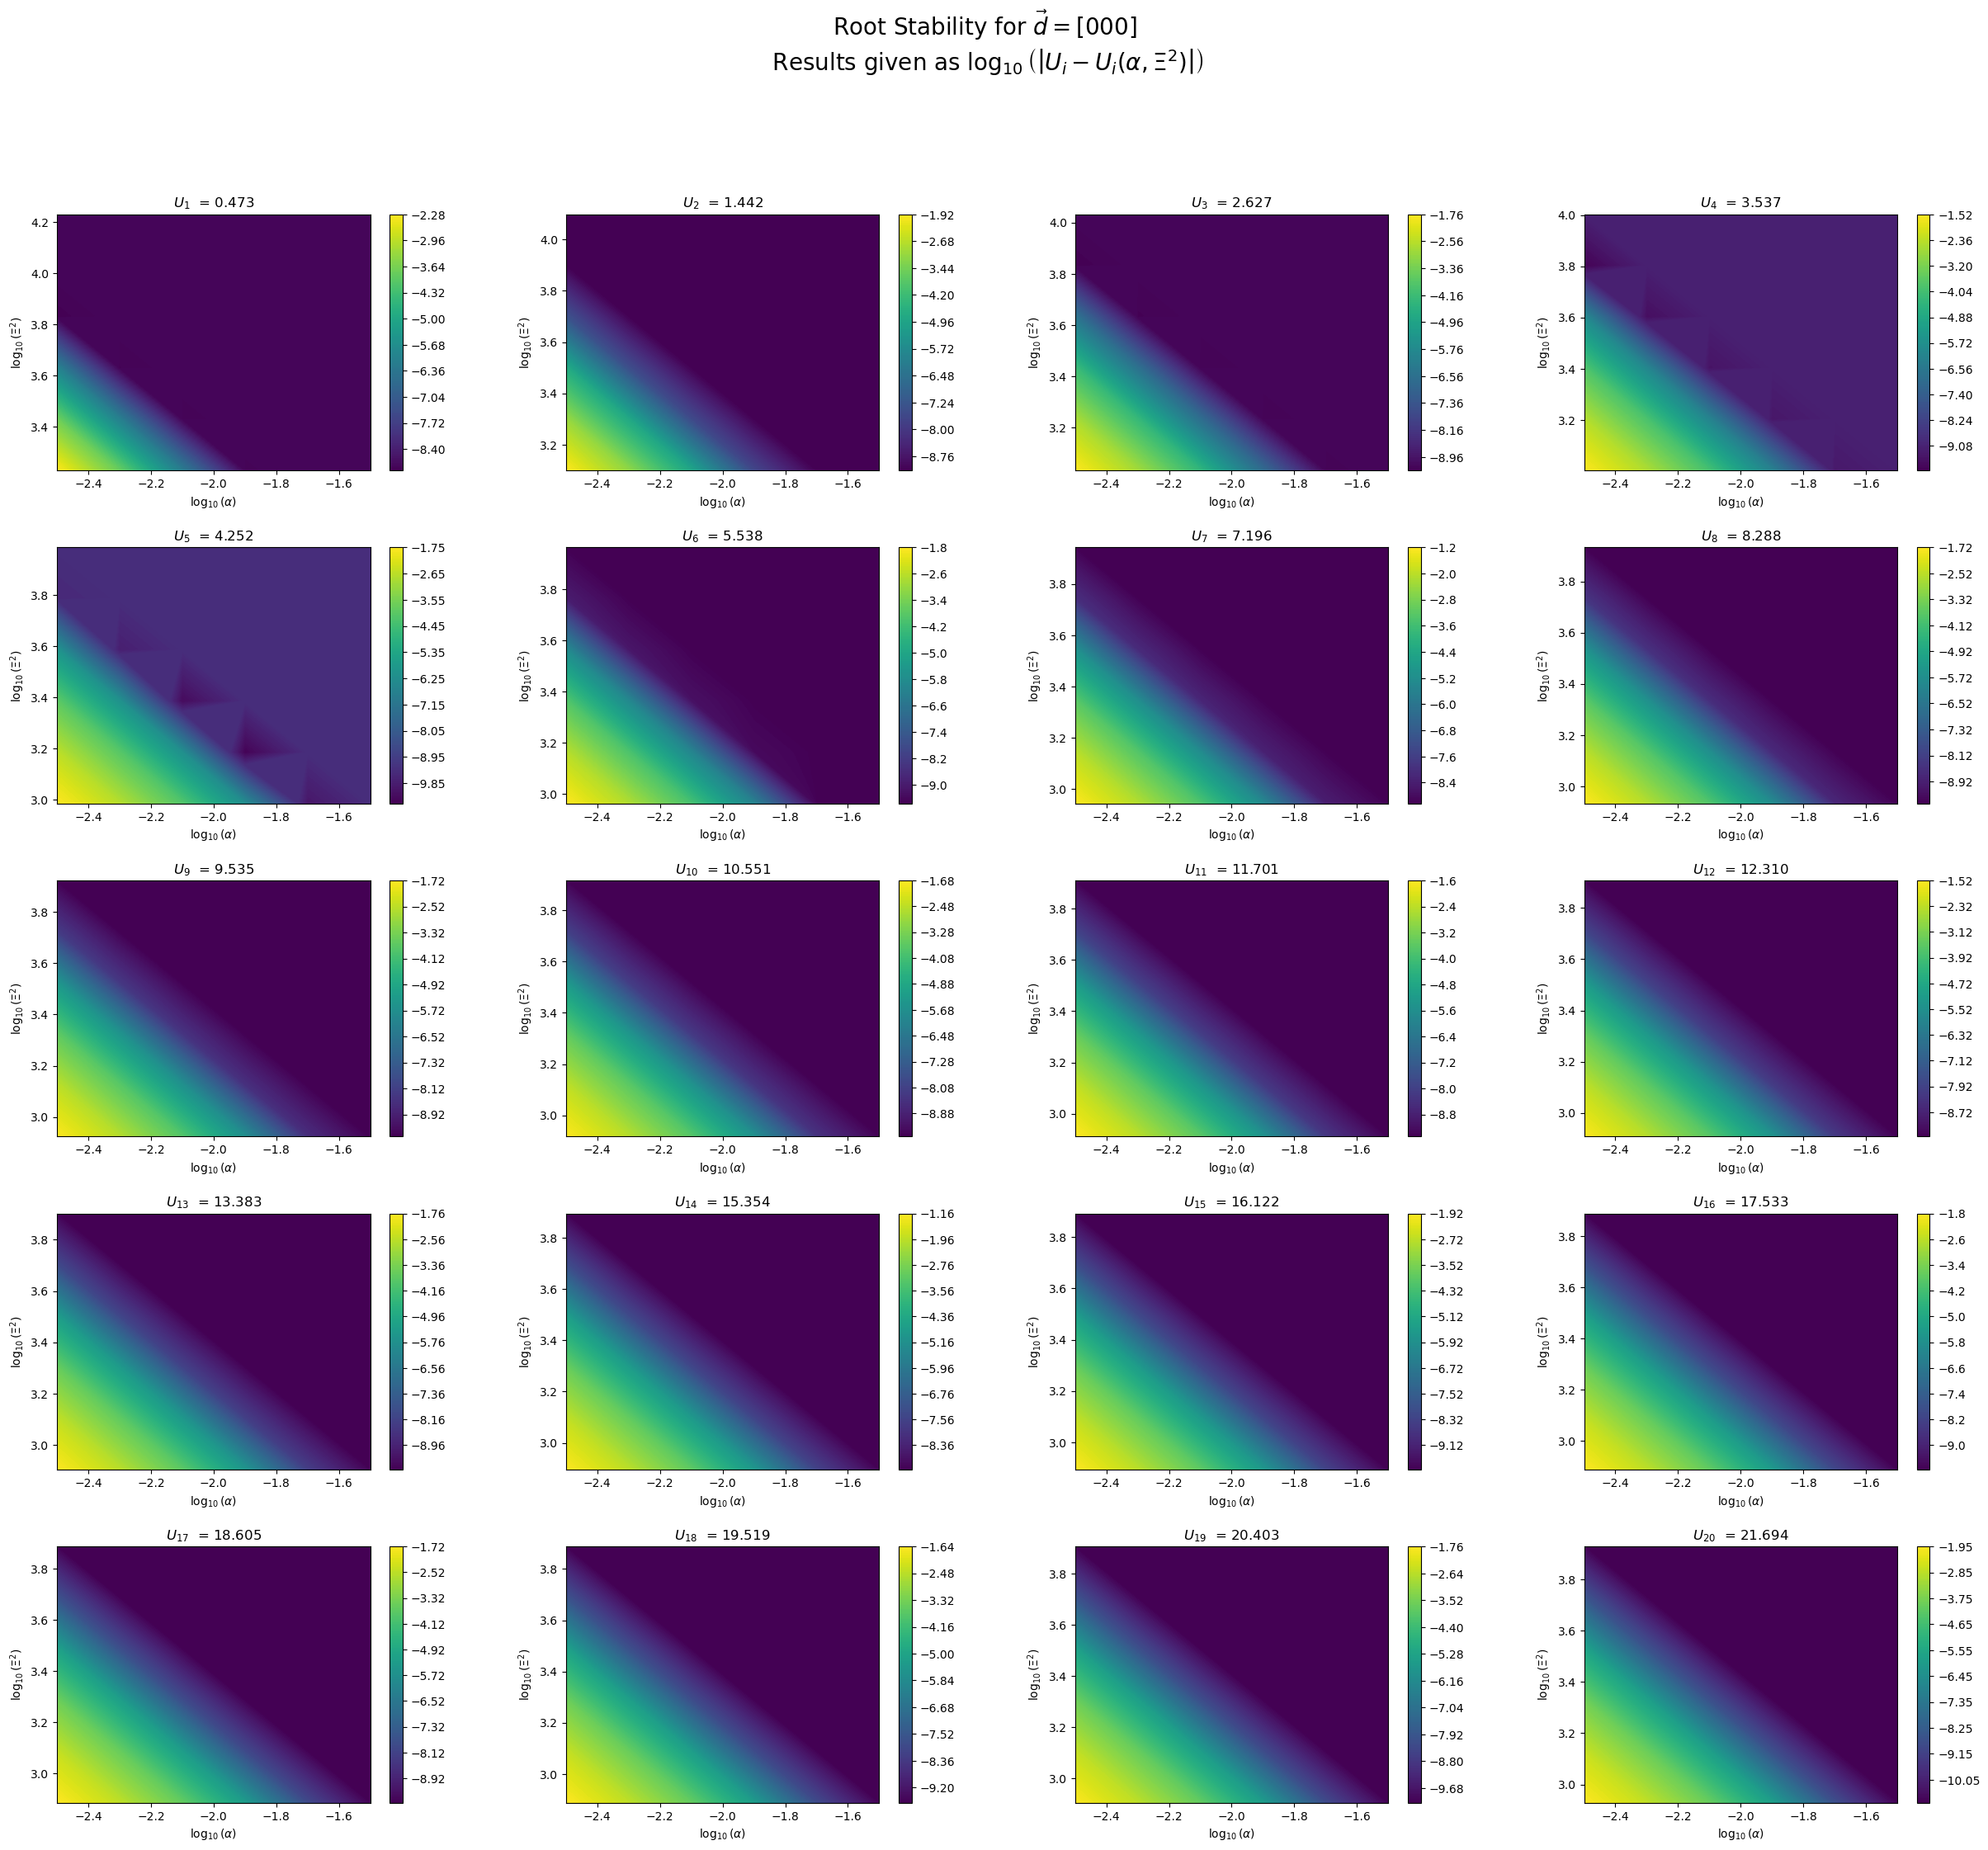

In [164]:



fig, axs = plt.subplots(5, 4, figsize=(30, 25))

# Iterate over the columns of all_roots
for i in range(20):
    # Calculate the row and column indices for the subplot
    row = i // 4
    col = i % 4
    
    # Plot each column in a separate subplot
    im = axs[row, col].contourf(np.log10(ALPHA_TOTAL[i]), np.log10(CUTOFF_TOTAL[i]), np.log10(np.abs(Z_TOTAL[i]- zeros_before[i])), levels=resolution**3 )
    axs[row, col].set_xlabel('$\log_{10}\left(\\alpha\\right)$')
    axs[row, col].set_ylabel('$\log_{10}\left(\Xi^2\\right)$')
    axs[row, col].set_title('$U_{{{}}}$  = {:.3f}'.format(i+1,zeros_before[i]))
    fig.colorbar(im,ax=axs[row, col])
# Add colorbar


# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Show the plot
fig.suptitle(f'Root Stability for $\\vec d  = {{{d_vec}}}$ \n Results given as $\log_{{10}}\left( \left|{{U_i-U_i(\\alpha, \Xi^2)}}\\right|\\right)$ ', fontsize=20)
plt.savefig("root_stability/"+folder_name+"/stability.png")
plt.show()


In [1]:
from stability_analysis import  stability_analysis

100%|██████████| 21/21 [19:36<00:00, 56.02s/it]  


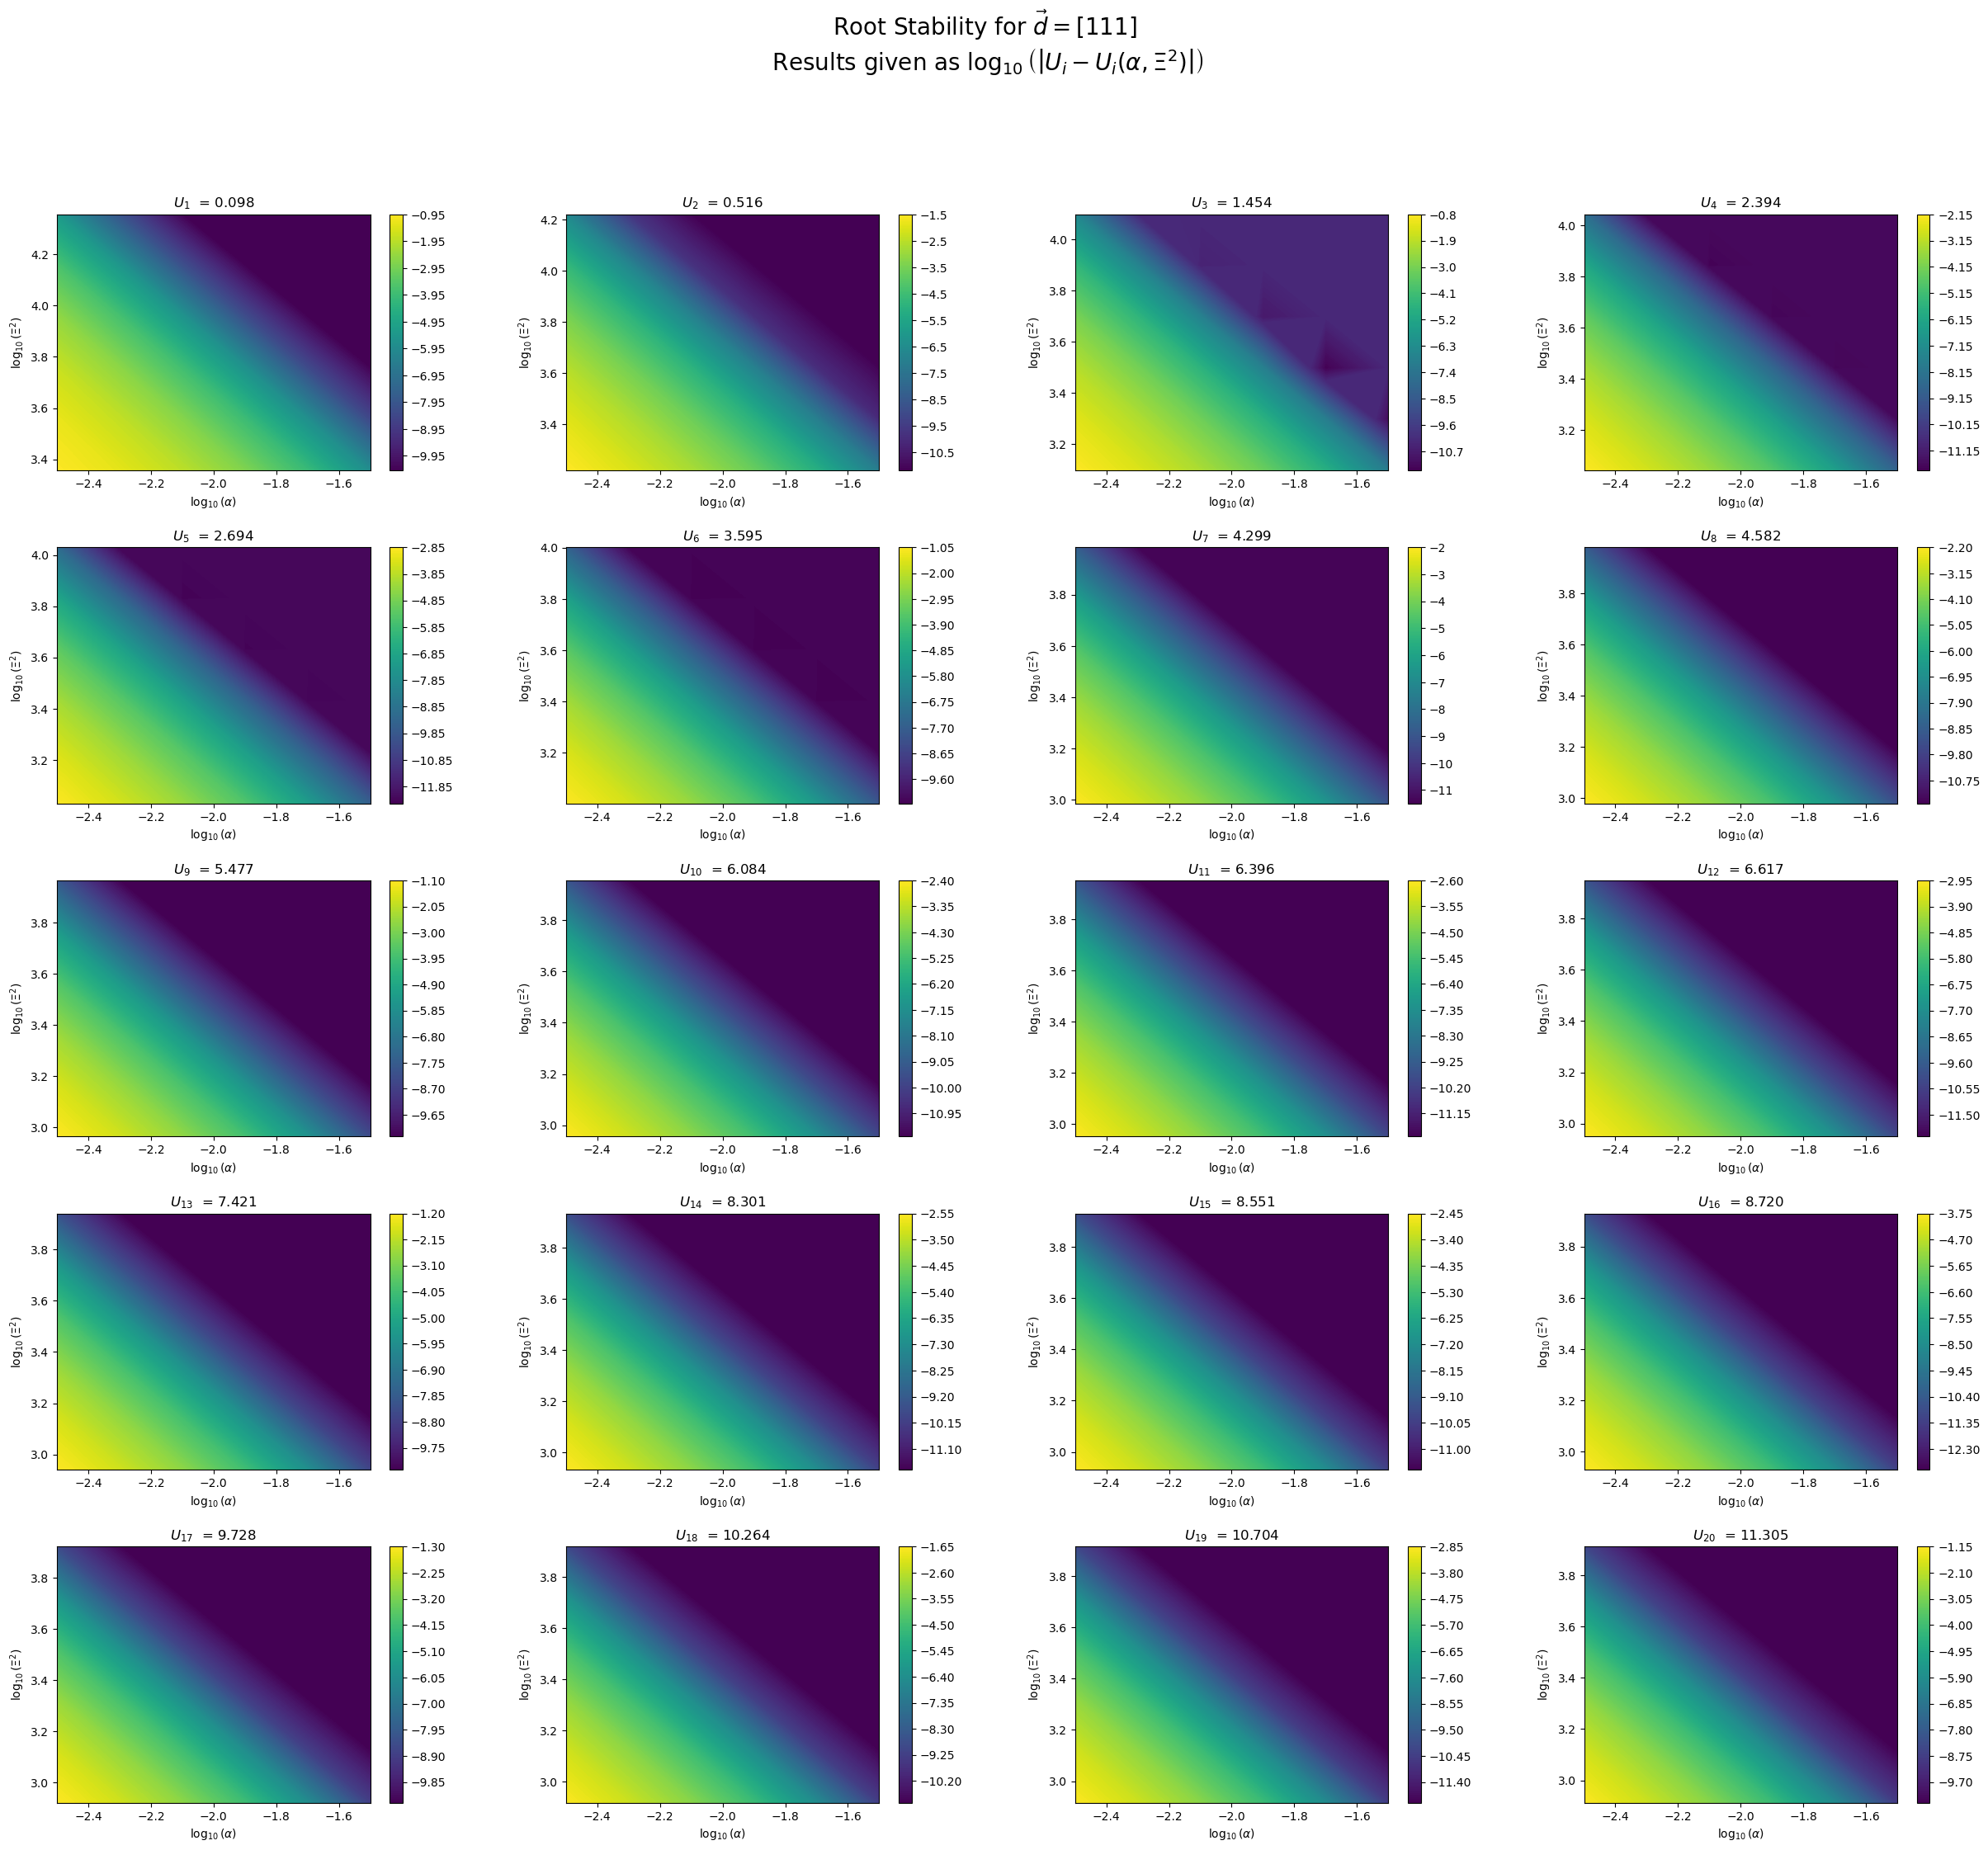

In [166]:
d = np.array([1,1,1])
stability_analysis(d, 0.01)

In [167]:
np.load("root_stability/d_111/data.npz")["meta_data"]

array(['0.01', '6', '[1 1 1]'], dtype='<U32')

In [194]:
data = np.load("root_stability/d_000/data.npz")

In [195]:
Z_TOTAL= data["Z_TOTAL"]
ALPHA_TOTAL = data["ALPHA_TOTAL"]
CUTOFF_TOTAL = data["CUTOFF_TOTAL"]
zeros_before = data["zeros_before"]
asymptotes_before = data["asymptotes_before"]
meta_data = data["meta_data"]


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_50474/1871088563.py:10: RuntimeWarning: divide by zero encountered in log10
  im = axs[row, col].contourf(np.log10(ALPHA_TOTAL[i]), np.log10(CUTOFF_TOTAL[i]), np.log10(np.abs(Z_TOTAL[i]- zeros_before[i])), levels=resolution**3 )
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_50474/1871088563.py:10: RuntimeWarning: invalid value encountered in log10
  im = axs[row, col].contourf(np.log10(ALPHA_TOTAL[i]), np.log10(CUTOFF_TOTAL[i]), np.log10(np.abs(Z_TOTAL[i]- zeros_before[i])), levels=resolution**3 )


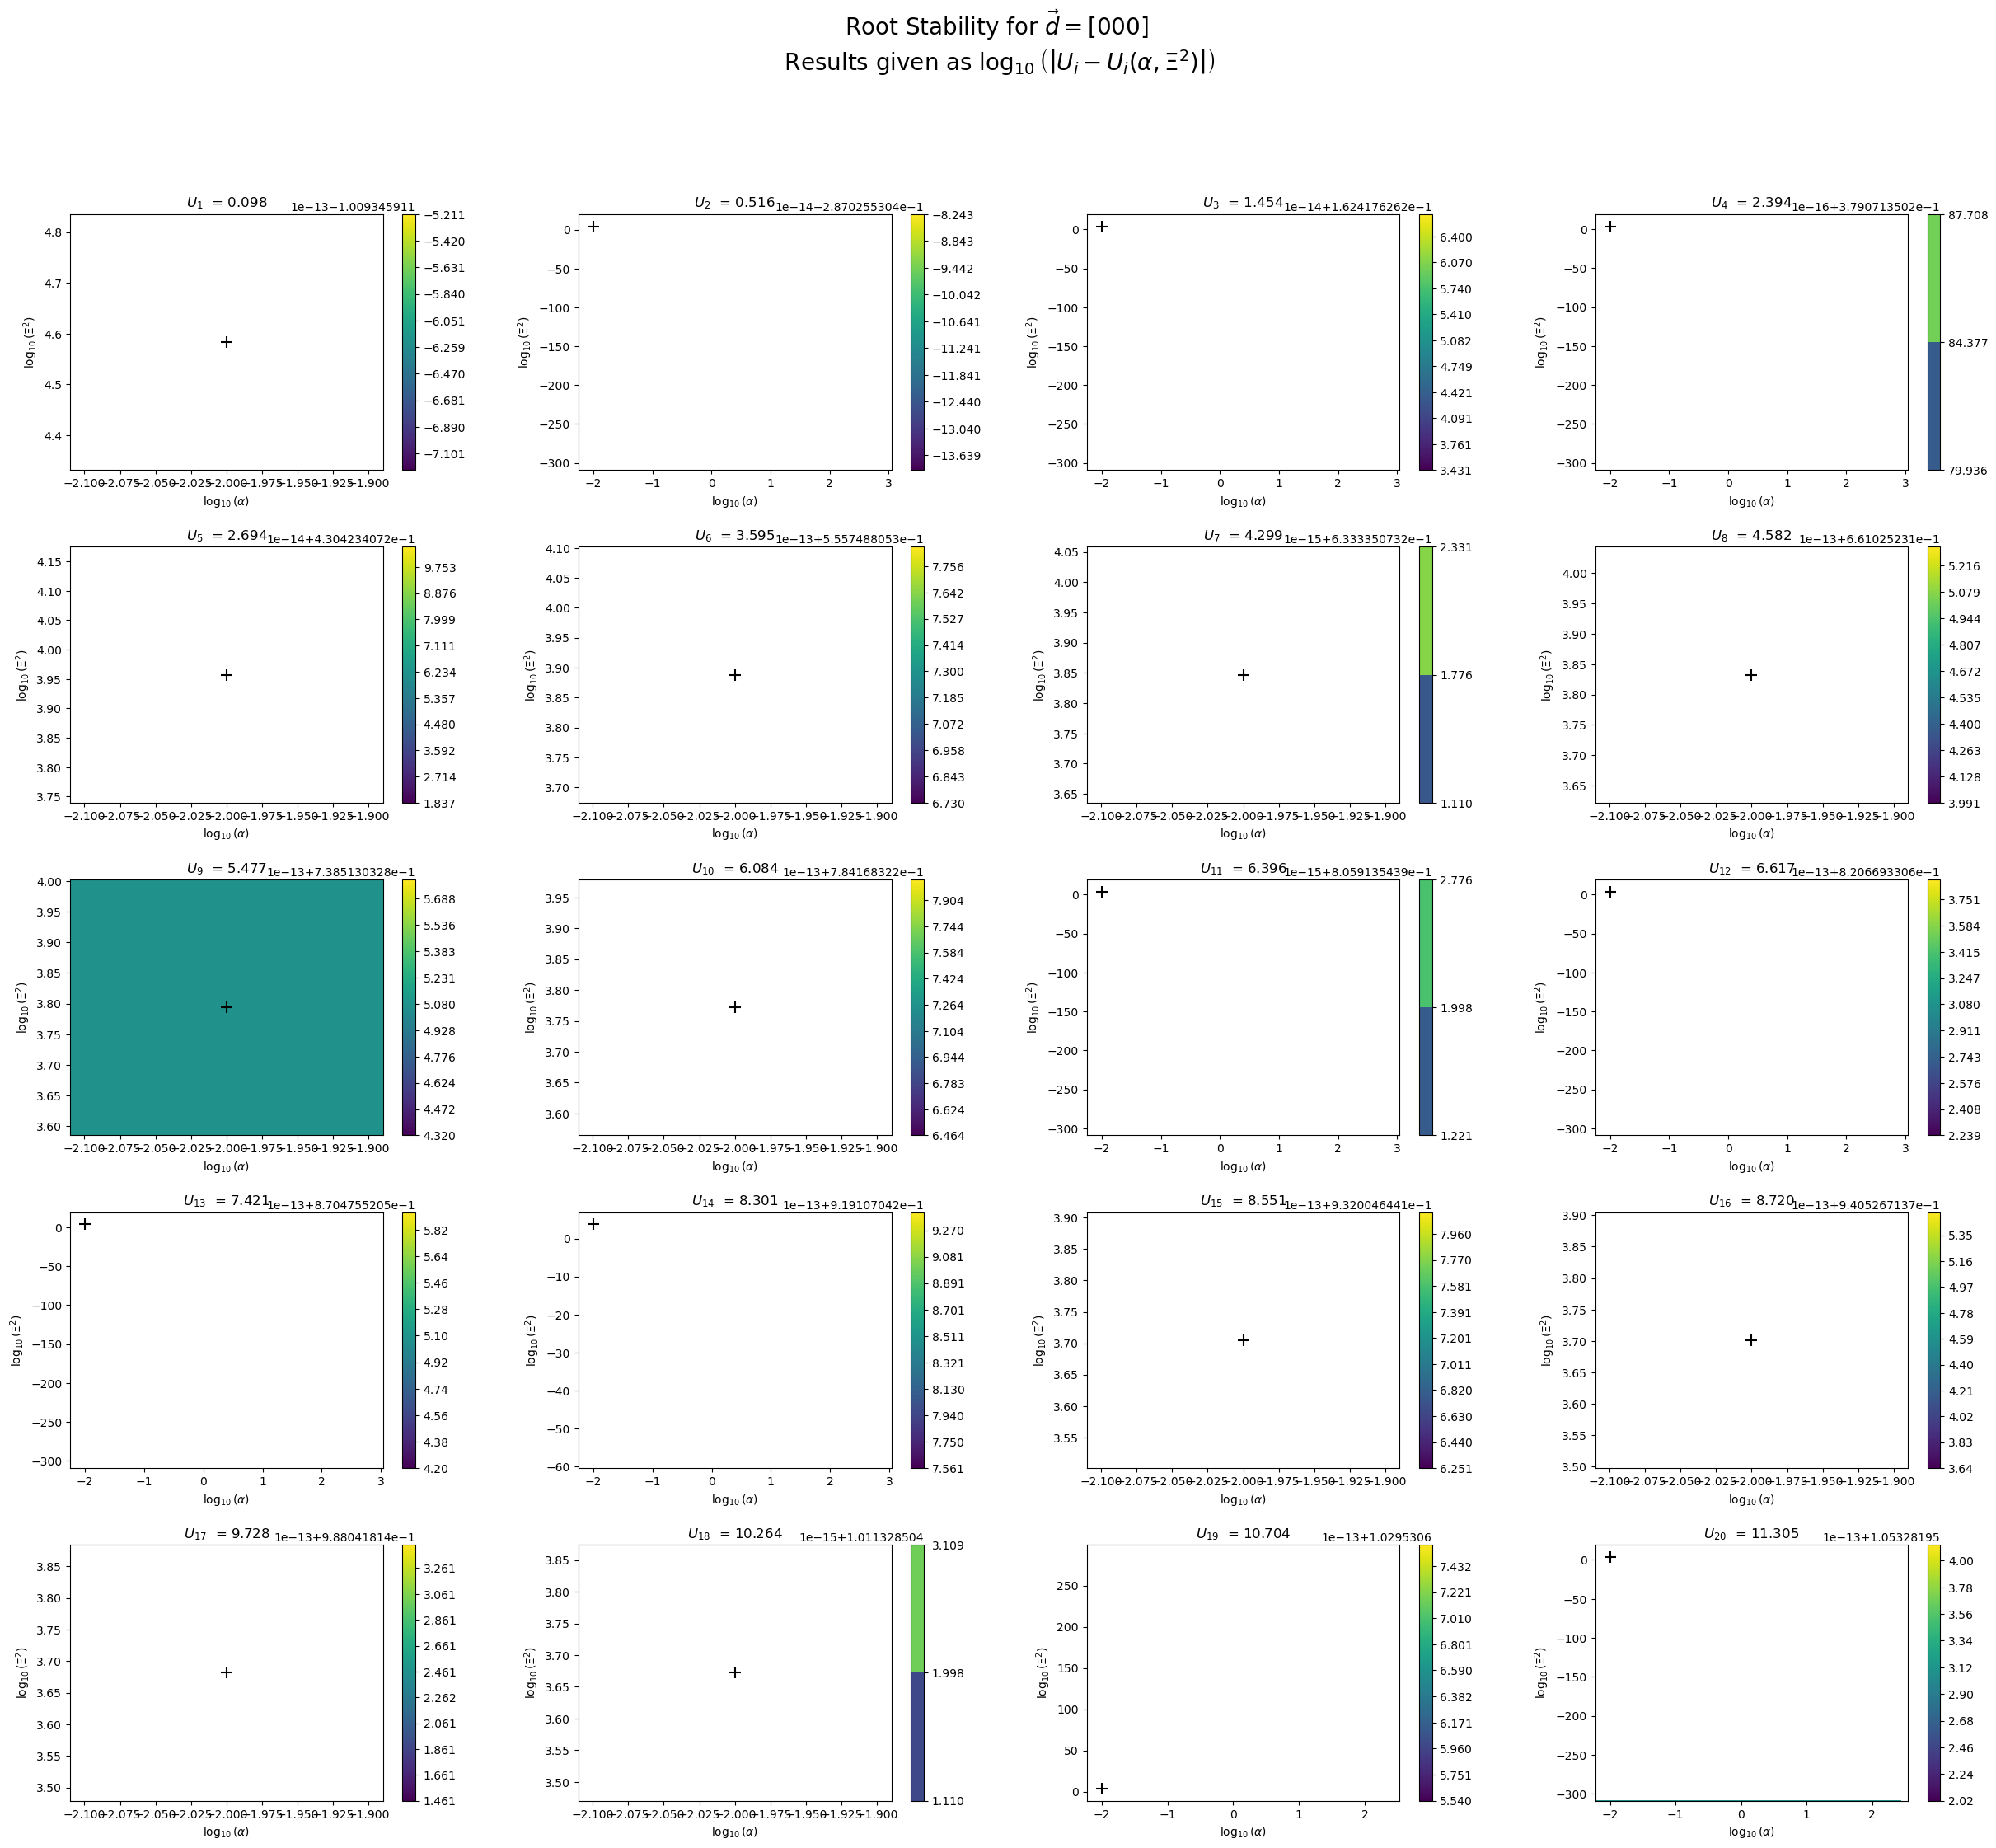

In [192]:
data = np.load("root_stability/d_000/data.npz")
Z_TOTAL= data["Z_TOTAL"]
ALPHA_TOTAL = data["ALPHA_TOTAL"]
CUTOFF_TOTAL = data["CUTOFF_TOTAL"]
zeros_before = data["zeros_before"]
asymptotes_before = data["asymptotes_before"]
meta_data = data["meta_data"]


vals = np.log10(KSS_new(3,0.01,zeros_before))
fig, axs = plt.subplots(5, 4, figsize=(30, 25))

# Iterate over the columns of all_roots
for i in range(20):
    # Calculate the row and column indices for the subplot
    row = i // 4
    col = i % 4
    
    # Plot each column in a separate subplot
    im = axs[row, col].contourf(np.log10(ALPHA_TOTAL[i]), np.log10(CUTOFF_TOTAL[i]), np.log10(np.abs(Z_TOTAL[i]- zeros_before[i])), levels=resolution**3 )
    axs[row, col].set_xlabel('$\log_{10}\left(\\alpha\\right)$')
    axs[row, col].set_ylabel('$\log_{10}\left(\Xi^2\\right)$')
    axs[row, col].set_title('$U_{{{}}}$  = {:.3f}'.format(i+1,zeros_before[i]))


    
    axs[row, col].scatter(np.log10(0.01), (vals[i]), c = "black", s = 100, marker = '+')  # Add red point
    


    fig.colorbar(im,ax=axs[row, col])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Show the plot
fig.suptitle(f'Root Stability for $\\vec d  = {{{d_vec}}}$ \n Results given as $\log_{{10}}\left( \left|{{U_i-U_i(\\alpha, \Xi^2)}}\\right|\\right)$ ', fontsize=20)
#plt.savefig("root_stability/"+folder_name+"/stability.png")
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
from tqdm import tqdm
from pathlib import Path
from zeta import zeta
from stability_analysis import *


In [2]:


d_vec = np.array([2,0,0])
alpha = 0.01
resolution = 6



100%|██████████| 20/20 [9:23:54<00:00, 1691.70s/it]    


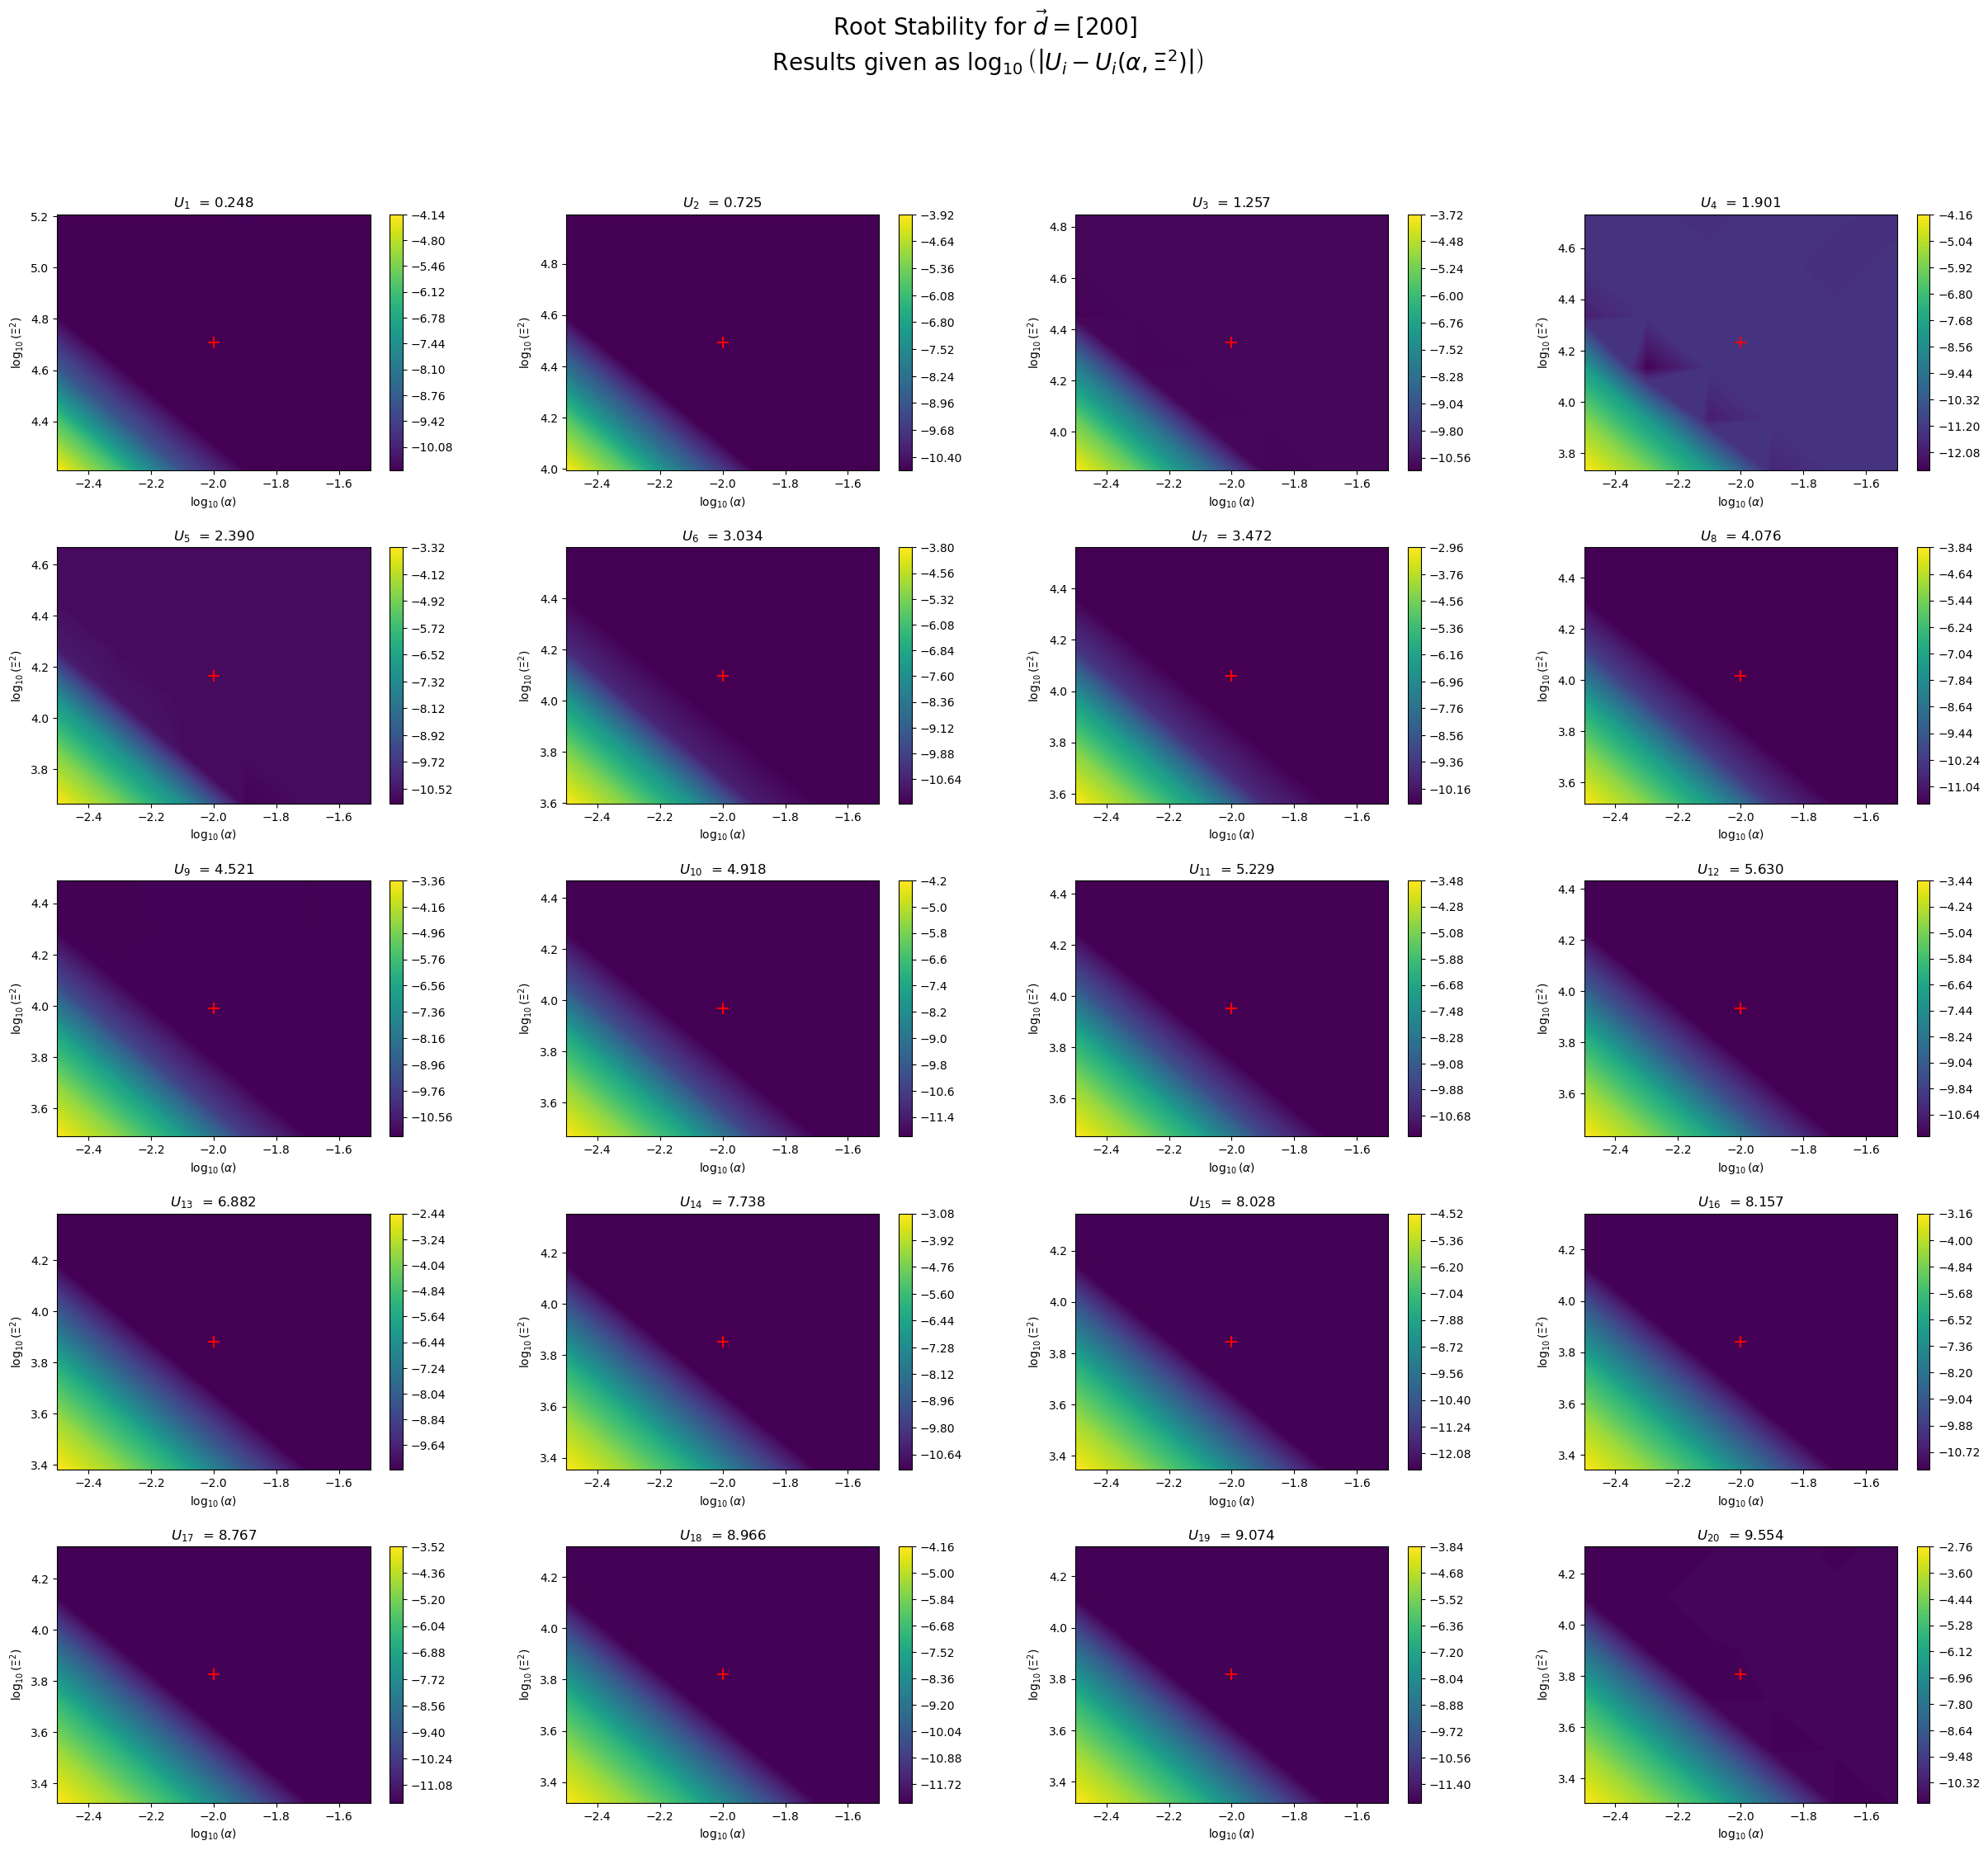

In [4]:

stability_analysis(d_vec, alpha, resolution)
